# Welcome to your first EDA \(Exploratory Data Analysis\)



### Our task at hand \-\- I hope you like penguins!

For our mini project, we are going to use Pandas and Numpy to conduct a basic Exploratory Data Analysis on a penguins dataset. Specifically, we are looking at the <u>Palmer Archipelago \(Antarctica\) Penguins</u> dataset, which you can find here:  [https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins\-raw.csv](https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins-raw.csv)

Not sure what an exploratory data analysis is? You can google it! The best definition I found is below:

_**Exploratory Data Analysis**_ **refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypotheses and to check assumptions with the help of summary statistics and graphical representations.**



In [23]:
#Before anything else let's import our library for data analysis, pandas.
import pandas as pd

### Step 1: Loading in and understanding our data

We need to read in our data. It is currently a .csv \(comma\-separated value\) file, and we generally use the pd.read\_csv\(\) function from pandas to read our data into a dataframe. 



In [24]:
penguins_dataframe = pd.read_csv("https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins-raw.csv")

**TODO:** Can you run the .head\(\) and .tail\(\) function on our new dataframe? Can you print the name of all the columns in our dataframe? How about the number of rows?


In [3]:
# Run head() on penguins_dataframe
head(4)penguins_dataframe

SyntaxError: invalid syntax (<ipython-input-3-9eaca7e4b3f6>, line 2)

In [50]:
# Run tail() on penguins_dataframe
tail(2)penguins_dataframe

In [4]:
# Print the name of all the columns in our dataframe
Study name, sample number, species, region, island, stage, individual ID, clutch completion, date egg, culmen length(mm), culmen depth(mm), flipper length, body mass, sex, delta 15 N(o/oo), Delta 13 C(o/oo), Comments

SyntaxError: invalid syntax (<ipython-input-4-da9008a1abd9>, line 2)

In [6]:
# Use google to find out how to print the number of rows in this dataset.
df.count

SyntaxError: invalid syntax (<ipython-input-6-94d7083a92a1>, line 2)

### Step 2: Do your research

What do the column names mean? At this point you should look up the meanings of any columns you don't know about and make some comments below. 

Typically at this point we would read up on the domain we are performing data analysis on. To do research on penguins you should probably get to know something about penguins!



### Step 3: Cleaning up our Data

This data is a lot to take in. How do we know if we can even use this data? I see some weird columns and lots of N/A values.

Let's talk through some functions to clean our data and see if it is salvagable. To start, we cannot use all of these columns. I'm thinking I want to get rid of "studyName" and "Comments" since they are not super useful for understanding the data relationships. I'll do that below. 


In [25]:
#Make a list of what you want to drop
columns_to_drop = ['studyName', 'Comments']

#Drop the columns using drop()
penguins_dataframe.drop(columns_to_drop, axis=1, inplace = True) #axis = 1 lets pandas know we are dropping columns, not rows.

#Check that they are dropped
penguins_dataframe.head(1)

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN


**What does inplace mean?** This argument in the `drop()` function means we are changing the dataframe in place! If we had `inplace = False`, we would need to create a new dataframe like so: 

`new_penguins_dataframe = penguins_dataframe.drop(columns_to_drop, axis=1, inplace = False)`

**TODO:** Can you drop the Sample Number, Individual ID, Delta 15 N \(o/oo\), and Delta 13 C \(o/oo\) columns using the example above?



In [28]:
# Drop the Sample Number, Individual ID, Delta 15 N (o/oo), and Delta 13 C (o/oo) columns using the example above.
columns_to_drop = ['Sample Number', 'Individual ID','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

#Drop the columns using drop()
penguins_dataframe.drop(columns_to_drop, axis=1, inplace = True) #axis = 1 lets pandas know we are dropping columns, not rows.

#Check that they are dropped


#### Getting Rid of N/A's

I see lots of N/A's, which we typically cannot visualize or use in machine learning.
Now, I want to get rid of all the rows that have NA's in them. I'll show you how. **TODO:** Can you print the number of rows our dataframe has after I drop the NAs?



In [29]:
# This is a very convenient function to drop all rows that have N/A values!
penguins_dataframe.dropna(inplace=True)
penguins_dataframe.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

In [11]:
#Print the number of rows our new dataframe has.
5 rows

### Exploring the Data

Pandas has some amazing tools for exploring your data. Since this is a **mini** project, we will walk through only a few key features of pandas exploration. You can expect to do lots of research on your own to best explore, clean, and visualize your data for your project. 

First we will learn how to access certain columns of data and use conditions to get subsets of data.



In [26]:
# access a column using df["<COLUMN_NAME"] or df.COLUMN_NAME
penguins_dataframe["Species"].head()

0    Adelie Penguin (Pygoscelis adeliae)
1    Adelie Penguin (Pygoscelis adeliae)
2    Adelie Penguin (Pygoscelis adeliae)
3    Adelie Penguin (Pygoscelis adeliae)
4    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

In [27]:
penguins_dataframe.Species.head()

0    Adelie Penguin (Pygoscelis adeliae)
1    Adelie Penguin (Pygoscelis adeliae)
2    Adelie Penguin (Pygoscelis adeliae)
3    Adelie Penguin (Pygoscelis adeliae)
4    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

In [28]:
#You can also access multiple columns using double brackets (printing a "list" of columns)
penguins_dataframe[["Species","Region"]].head()

,Species,Region
0,Adelie Penguin (Pygoscelis adeliae),Anvers
1,Adelie Penguin (Pygoscelis adeliae),Anvers
2,Adelie Penguin (Pygoscelis adeliae),Anvers
3,Adelie Penguin (Pygoscelis adeliae),Anvers
4,Adelie Penguin (Pygoscelis adeliae),Anvers


**TODO: Can you print the last five rows of the Island and Region columns?** 



In [29]:
#Print the last five rows of the Island and Region columns.
tail(5)

,Island,Region
328,Dream,Anvers
329,Dream,Anvers
330,Dream,Anvers
331,Dream,Anvers
332,Dream,Anvers


<u>**Conditions in Pandas**</u>

Pandas is also incredible for selecting subsets of columns that fit a certain condition. Check out the code below to get only the Adelie penguins.



In [30]:
penguins_dataframe[penguins_dataframe["Species"] == "Adelie Penguin (Pygoscelis adeliae)"].head()

,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE


Conditions in pandas work just like `if` statements in python. 

**TODO: Can you tell me which species of penguin can have a flipper length greater than or equal to 230 by using conditions in pandas?**



In [13]:
# Use pandas to find out which species of penguin can have a flipper length greater than or equal to 230
None

SyntaxError: unexpected EOF while parsing (<ipython-input-13-725270494dff>, line 2)

**TODO:** Take 5 minutes to explore the dataset on your own. There's some space for you to code below.

Think of what you want to learn. Maybe what the smallest flipper size penguin is? How about the smallest culmen width? What is the largest penguin by mass?


In [15]:
penguins_dataframe[penguins_dataframe["Species"] == "Adelie Penguin (Pygoscelis adeliae)"].head(2)

NameError: name 'penguins_dataframe' is not defined

### Visualize on the Fly with Pandas

Before we create mind\-blowing visualizations, it is sometimes worth it to create quick visualizations to get ourselves oriented with the data and it's underlying patterns. 

I put a simple histogram below that helps me understand how the dataset is distributed. Notice that is is pretty hard to read and ugly, but it gets the job done for the data scientist. I now know that there are three species of penguin we are worried about, and that we have a lot more samples of the Adelie penguin than the Gentoo and Chinstrap \(a good to know for machine learning\). 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8afd77b20>]],
      dtype=object)

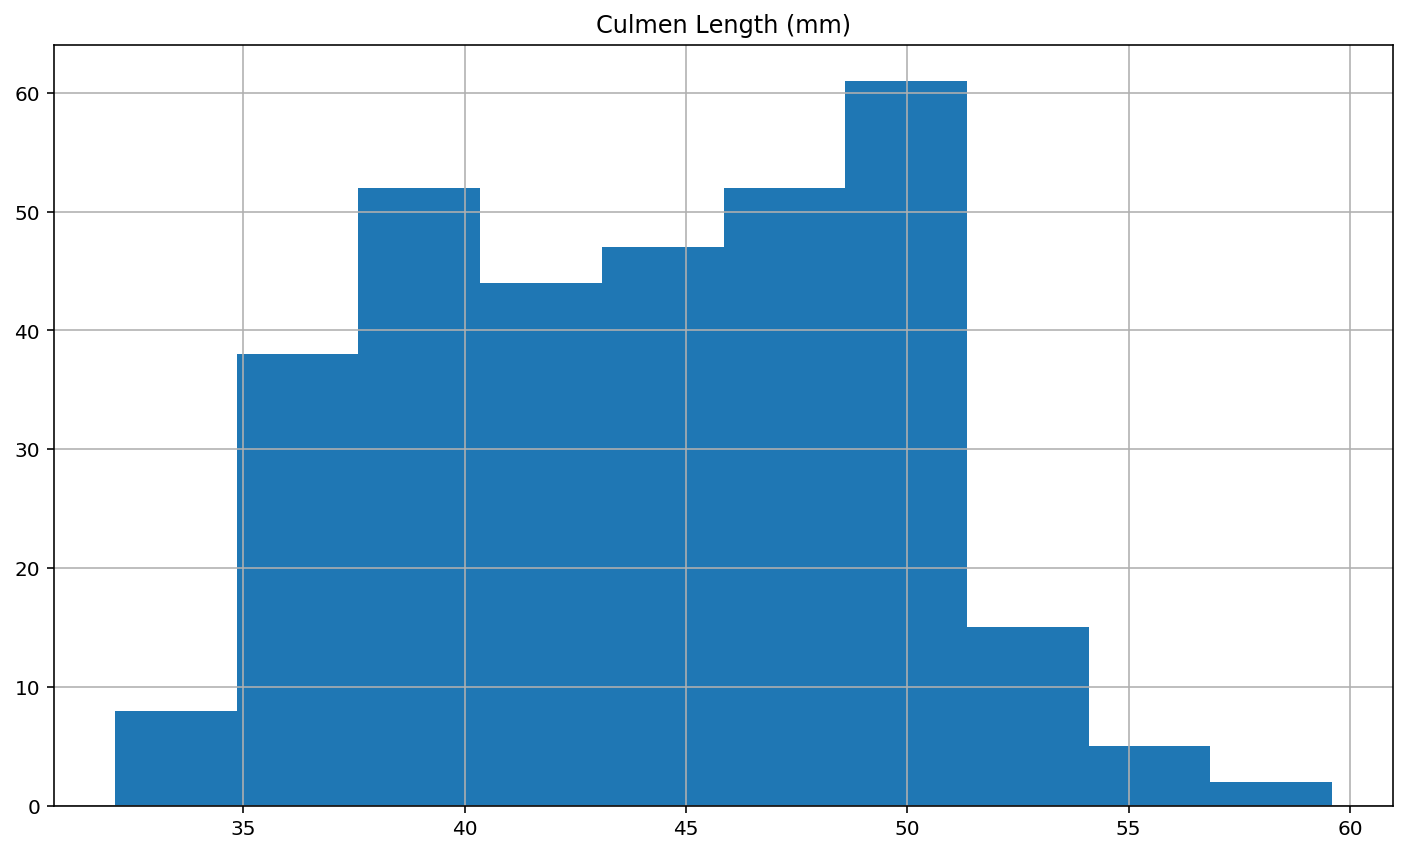

In [33]:
# Create a histogram of a column's data using the df.hist() function. I found it here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

penguins_dataframe.hist(column='Culmen Length (mm)') # '18.7','17.4','18.0','19.3','20.6'


**TODO: Create a histogram of another column of your choice below.**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8afc68a60>]],
      dtype=object)

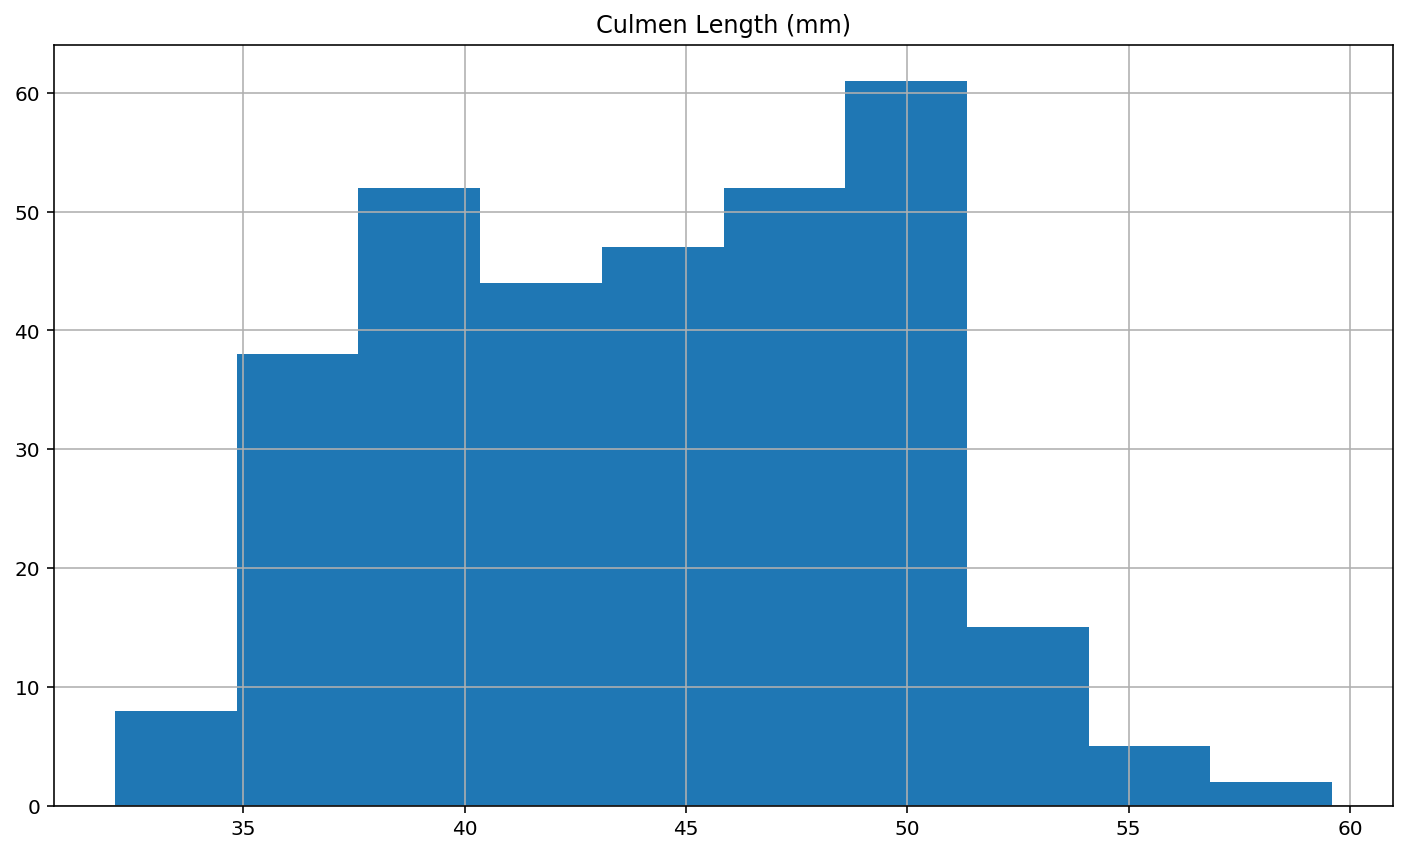

In [35]:
#Create a histogram of another column of your choice below.
penguins_dataframe.hist(column='Culmen Length (mm)') # '18.7','17.4','18.0','19.3','20.6'


**TODO:** Now, let's have some fun. Can you create plots using the following functions?

1. Scatter Plot: [https://pandas.pydata.org/pandas\-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html)
2. Pie Plot: [https://pandas.pydata.org/docs/user\_guide/visualization.html\#visualization\-pie](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-pie)

Pro challenge: Add a title to each!



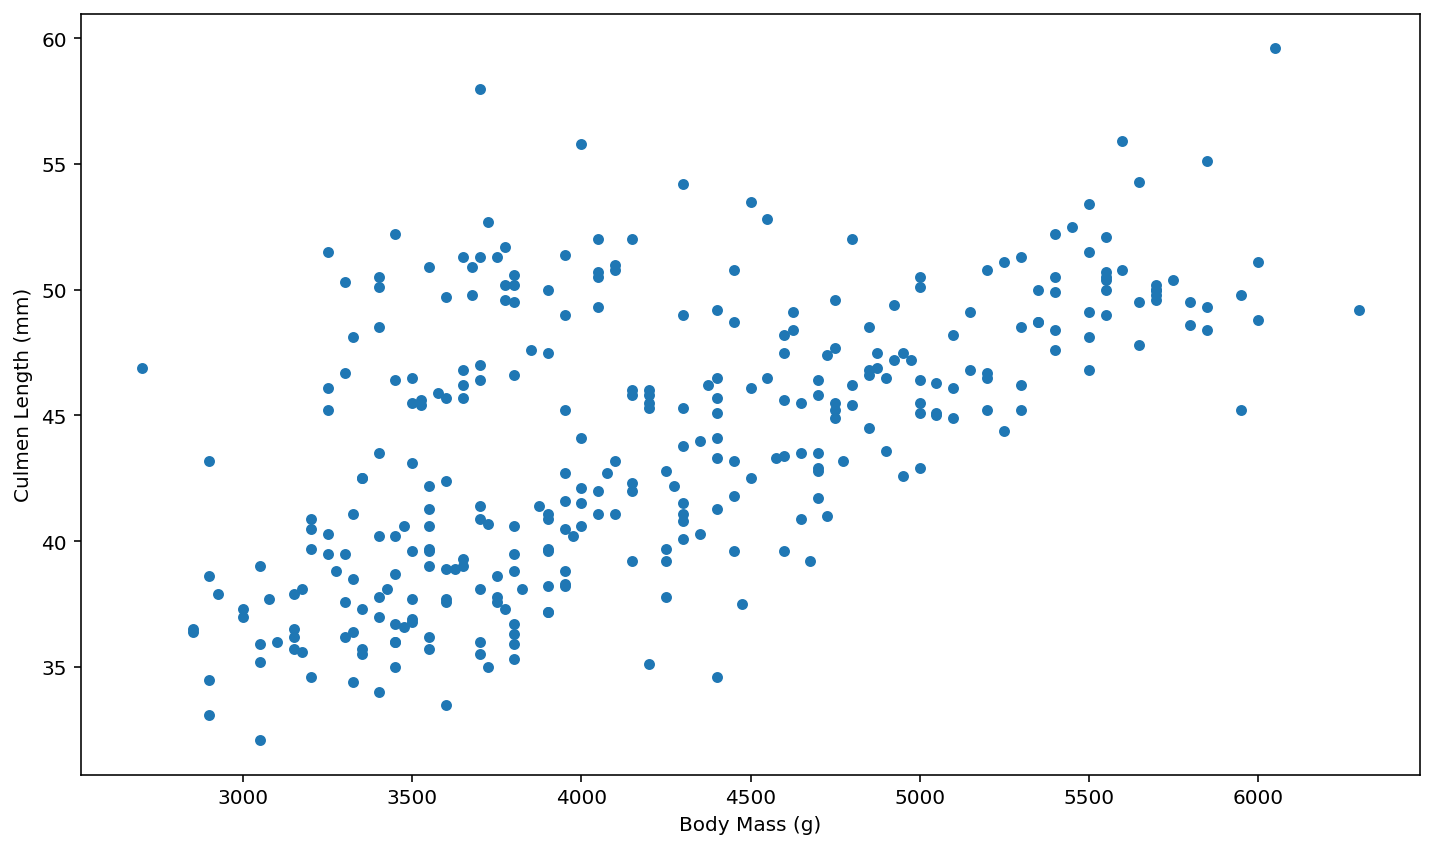

In [47]:
#Create a scatter here
penguins_dataframe.plot.scatter(x="Body Mass (g)",y= "Culmen Length (mm)")

In [58]:
#Create a pie plot here - might look more like art than data science. Is a pie chart a good choice for the column?


### Creating Beautiful Visualizations with Plotly

So far, it looks like a scatter plot might be our best bet! Now we want to make a beautiful scatter plot using `plotly.`Just like pandas and numpy, plotly is a module that lets us create beautiful visualizations in just a few lines of code. 

I'm only going to help with the import, so I need you to spend time on plotly's documentation in order to build the same scatter plot you did in the last section, but nicer. Maybe google "Scatter plots in plotly python" to start!



In [59]:
import plotly.express as px #importing plotly

**TODO:** Create a scatter plot using plotly. Please add a title here!

Maybe google "Scatter plots in plotly python" to start!



In [54]:
# Create a scatter plot

fig=px(penguins_dataframe, x='Culmen Length (mm)', y='Culmen Depth (mm)', title='Plotly Scatter Plot Example')
fig.show()

TypeError: 'module' object is not callable

**TODO:** Let's make it look even better. Copy your function from above but add another argument to the function by setting the `color="Species"`. Not sure what this means? Get to the scatter plots page on plotly and scroll down to the "Setting size and color with column names" section.



In [61]:
# Create the same scatter plot with color="Species". Feeling crazy? Set a column name to the "size" argument as well!


**Scatter Matrix:** I wanted to create a scatter plot for every possible numerical combination of 'Culmen Length \(mm\)', 'Culmen Depth \(mm\)', 'Flipper Length \(mm\)', and 'Body Mass \(g\)'. This could help me understand what is correlated and could mean a relationship between each other. The code to do so is below; are there any findings you can take away from this data?



In [62]:
# My scatter matrix!
numerical_penguins_df = penguins_dataframe[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)']]
fig = px.scatter_matrix(numerical_penguins_df)
fig.show()

### Putting the DA in EDA

We now have explored our data some, and have built some beautiful visualizations to showcase patterns our data. But having a plot doesn't mean anything to someone who can't understand how to read plots.

Below you can continue your analysis if you have hypotheses you'd like to explore with the penguins \(i.e. is flipper length related to culmen depth? Which species has the largest culmen area?\). After you are done, please write up some descriptions for your findings on this dataset. One question we answered earlier was _which species has the largest flipper length?_ You can start with you


In [0]:
#Continue your analysis below -- try something new!

In [0]:
#Continue your analysis

Thank you!

